In [107]:
!pip install cryptocompare

In [108]:
from google.colab import drive
drive.mount('/content/gdrive')
import requests
import os
import yaml
import json
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
from torch.utils.tensorboard import SummaryWriter
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
import urllib3
import cryptocompare
from datetime import datetime

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [109]:
print("PyTorch version:", torch.__version__)

PyTorch version: 1.1.0


{'Response': 'Success', 'Type': 100, 'Aggregated': False, 'Data': [{'time': 1439769600, 'close': 257.13, 'high': 259.93, 'low': 252.87, 'open': 257.12, 'volumefrom': 47882.96, 'volumeto': 12378054.89}, {'time': 1439856000, 'close': 246.72, 'high': 257.53, 'low': 245.74, 'open': 257.13, 'volumefrom': 94503.04, 'volumeto': 23896056.77}, {'time': 1439942400, 'close': 226, 'high': 247.95, 'low': 214.29, 'open': 246.72, 'volumefrom': 245822.71, 'volumeto': 55514712.14}, {'time': 1440028800, 'close': 234.66, 'high': 238.03, 'low': 225.54, 'open': 226, 'volumefrom': 90981.27, 'volumeto': 21225055.42}, {'time': 1440115200, 'close': 232.4, 'high': 236.3, 'low': 230.48, 'open': 234.66, 'volumefrom': 57649.08, 'volumeto': 13485729.48}, {'time': 1440201600, 'close': 229.54, 'high': 235.07, 'low': 221.04, 'open': 232.4, 'volumefrom': 74205.5, 'volumeto': 16976922.67}, {'time': 1440288000, 'close': 226.75, 'high': 232.7, 'low': 224.27, 'open': 229.54, 'volumefrom': 48840.79, 'volumeto': 11204081.47}

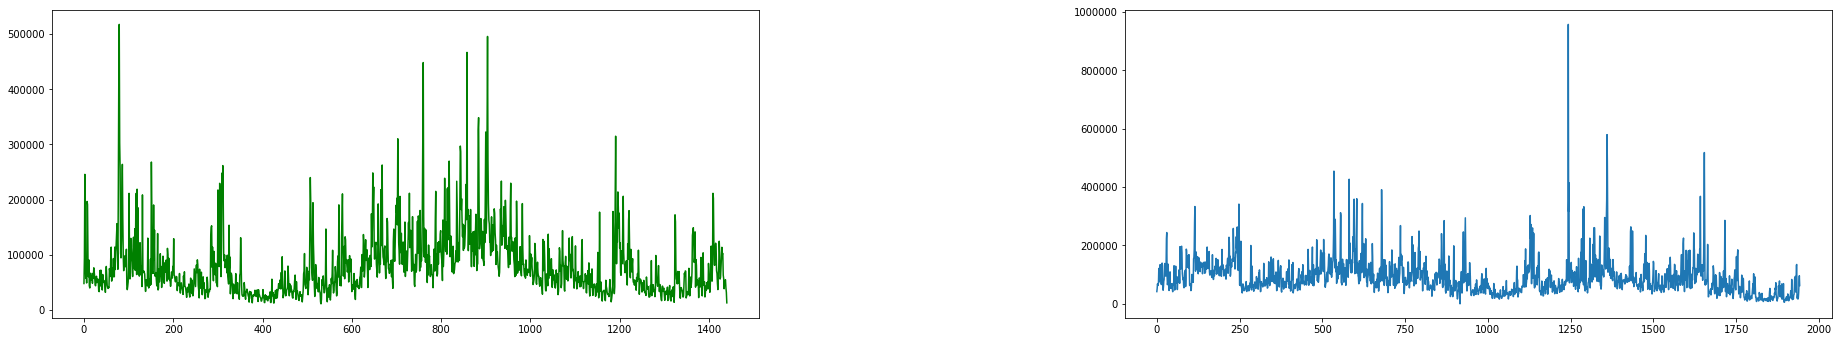

In [110]:
# hourly -- volume -- per day
# USD 

#cryptocompare api key:1 e3c9fe62074dbf5805d45f528d1e60c7ae15be68a63ba57ca3a5f2f9dbbf66f

#close,high,low,open,time,volumefrom,volumeto

def posix2Human(time_):
    timestamp = time_
    dt_object = datetime.fromtimestamp(timestamp)
    return dt_object

histPriceDay = cryptocompare.get_historical_price_day('BTC', curr='USD')
print((histPriceDay))

# Getting CryptoCompare BTC volume data -- 2000 API calls back 
vol = []
for idx, item in enumerate(histPriceDay['Data']):
    vol.append(item['volumefrom'])    

# -- Init subplots --
f,arr = plt.subplots(1,2)
  
arr[0].plot(np.array(vol),'g')

def fetch_latest_BTC_JSON():
    """Fetch the latest JSON data"""
    API_LINK = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=USD&apikey=SAITMI5ZUMGEKGKY'
    page = requests.get(API_LINK).json()
    return page

page = fetch_latest_BTC_JSON()

vol2 = []
for key,value in page['Time Series (Digital Currency Daily)'].items():
    vol2.append(float(value['5. volume']))
    
arr[1].plot(np.array(vol2))

plt.tight_layout()
f.set_figheight(5)
f.set_figwidth(30)

plt.show()



In [111]:
print('CryptoCompare last reported volume (yesterday): ', vol[-1])

CryptoCompare last reported volume (yesterday):  12818.46


In [112]:
def get_config(file_loc='/content/gdrive/My Drive/College/Undergraduate Research/StockData/config.yaml'):
    return yaml.safe_load(open(file_loc))
config = get_config()
print(type(config))
print(config)

<class 'dict'>
{'mlp_batch_size': 1, 'mlp_epochs': 50, 'mlp_learning_rate': 0.001}


In [0]:
"""
Basic multilayer perceptron subclass 
of three layers in PyTorch
"""
class MLP(nn.Module):
    def __init__(self,num_features):
        super(MLP,self).__init__()
        self.fc1 = nn.Linear(in_features=num_features,out_features=32)
        self.fc2 = nn.Linear(in_features=32,out_features=128)
        self.fc3 = nn.Linear(in_features=128,out_features=1)
    
    def forward(self, x):
        """"Forward pass definition"""
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = F.leaky_relu(self.fc3(x))
        return x
      
class NumberRegression_MLP(nn.Module):
    def __init__(self):
        super(NumberRegression_MLP,self).__init__()
        self.fc1 = nn.Linear(in_features=1,out_features=32)
        self.fc2 = nn.Linear(in_features=32,out_features=128)
        self.fc3 = nn.Linear(in_features=128,out_features=1)
    def forward(self, x):
        """"Forward pass definition"""
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = F.leaky_relu(self.fc3(x))
        return x

"""
Recurrent Neural Networks (RNN)
RNNs are an excellent method to model sequential data
and time series data. This is perfect for stocks and
crytocurrency price prediction.
"""
class TestRNN(nn.Module):
    def __init__(self,input_dim,hidden_dim,layer_amnt):
        super(TestRNN,self).__init__()
        
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.layer_amnt = layer_amnt
        
        self.lstm1 = nn.LSTM(input_size=self.input_dim,
                             hidden_size=self.hidden_dim,
                             num_layers=1,
                             bias=True,
                             batch_first=False,
                             dropout=0,
                             bidirectional=False
                            )
        self.fc1 = nn.Linear(in_features=150,out_features=256)
        self.fc2 = nn.Linear(in_features=256,out_features=128)
        self.fc3 = nn.Linear(in_features=128,out_features=32)
        self.fc4 = nn.Linear(in_features=32,out_features=1)
        
        pass
    def forward(self,x):
        pass
      
"""
Temporal Convolutional Neural Network (CNN)
Time series based convolutional neural network
"""
class TimeCNN(nn.Module):
    def __init__(self):
        super(TimeCNN,self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1,out_channels=256,kernel_size=2,stride=1,padding=0)
        self.mp1 = nn.MaxPool1d(kernel_size=2,stride=1)
        self.conv2 = nn.Conv1d(in_channels=128,out_channels=256,kernel_size=3,stride=1,padding=0)
        self.mp2 = nn.MaxPool1d(kernel_size=2,stride=1)
        self.fc1 = nn.Linear(in_features=512,out_features=512)
        self.fc2 = nn.Linear(in_features=512,out_features=128)
        self.fc3 = nn.Linear(in_features=128,out_features=1)
    def forward(self,x):
        x = x.unsqueeze(0)
        x = F.leaky_relu(self.conv1(x))
        #x = self.mp1(x)
        #x = F.relu(self.conv2(x))
        #x = self.mp2(x)
        x = x.reshape(-1)
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = F.leaky_relu(self.fc3(x))
        return x

In [0]:
class TickerData(torch.utils.data.Dataset):
    def __init__(self, table):
        self.dataset = table
    def __len__(self):
        return len(self.dataset)
    def __getitem__(self,idx):
        """idx --> data pointer"""
        return self.dataset[idx]

In [115]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device state:\t", device)
print("Device index:\t",torch.cuda.current_device())
print("Current device:\t", torch.cuda.get_device_name(device))

Device state:	 cuda
Device index:	 0
Current device:	 Tesla T4


In [0]:
def fetch_latest_BTC_JSON():
    """Fetch the latest JSON data"""
    API_LINK = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=USD&apikey=SAITMI5ZUMGEKGKY'
    page = requests.get(API_LINK).json()
    return page
  
def fetch_btc_prices():
    with open("/content/gdrive/My Drive/College/Undergraduate Research/StockData/BTC_data.json") as f:
        return json.load(f)      
      
def parse_alphaV_JSON(raw_data):
    # Remove meta data for now
    raw_data.pop('Meta Data',None)
    # Remove key name
    df = pd.DataFrame.from_dict(raw_data['Time Series (Digital Currency Daily)'],dtype=float)
    # Flip dates as columns into rows
    df = df.transpose()
    return df

def normalize():
    pass
  
def data_split(x_train,y_train):
        x_train, x_test, y_train, y_test = train_test_split(x_train,y_train,test_size=0.2,random_state=100,shuffle=False)
        return x_train, x_test, y_train, y_test

def train(model, x_data,y_data, original_prices):

    prices = torch.tensor(original_prices)
    max_price = torch.max(prices)
    min_price = torch.min(prices)

    print('----Dataset Prep----')
    x_train, x_test, y_train, y_test = data_split(x_data,y_data)
    train_tensorDataset = torch.utils.data.TensorDataset(torch.from_numpy(x_train),torch.from_numpy(y_train))
    train_data_loader = torch.utils.data.DataLoader(
        dataset=train_tensorDataset,
        batch_size=1,
        shuffle=False,
        num_workers=0
    )

    test_tensorDataset = torch.utils.data.TensorDataset(torch.Tensor(x_test),torch.Tensor(y_test))
    test_data_loader = torch.utils.data.DataLoader(
        dataset=test_tensorDataset,
        batch_size=1,
        shuffle=False,
        num_workers=0
    )

    print('-- Model Architecture --')
    print(model)
    
    # -- Model to CUDA GPU --
    if( str(device) == 'cuda'):
        print('Sending model to',torch.cuda.get_device_name(device),' GPU')
        model = model.cuda()
    #model.to(device)

    # -- Since we are predicting prices --> mean squared error is our loss function
    loss_func = torch.nn.MSELoss()

    # -- Optimizer --> Adam generally works best
    # TODO: choose a better learning rate later
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    total_loss = 0
    losses = []
    for epoch in (range(200)):
        for i, (examples,labels) in tqdm(enumerate(train_data_loader)):
          
            if( str(device) == 'cuda'):
                examples = examples.to(device)
                labels = labels.to(device)

            #print(examples , " ----- " , labels)
            
            optimizer.zero_grad()
            
            # -- Input to CUDA --
            #examples = examples.to(device)
            #labels = labels.to(device)
            
            y_predictions = model(examples.float())
            loss = loss_func(y_predictions.float(),labels.float())

            total_loss += loss.data

            # back-prop to update the weights
            loss.backward()
            # optimizer steps based on lr
            optimizer.step()

            y_preds = y_predictions.cpu().detach().numpy()
            y_preds = torch.tensor(y_preds)
            #print(y_preds.shape)
            test = un_normalize(y_preds, min_price, max_price)
            #print("---> ", test)
            #break

        print ('Epoch [{}/{}], Loss: {}'.format(epoch+1, 100, loss.data))
        #print(list(model.parameters()))
        print("-----------------------------------------------------------------------------")
        losses.append(loss.data)
    return losses, test_data_loader, loss_func, model, min_price, max_price, y_test


def table_edit(dataframe):
    dataframe = dataframe.drop(labels=['1b. open (USD)','2b. high (USD)','3b. low (USD)','4b. close (USD)'],axis=1)
    table_col_order = ['1a. open (USD)','2a. high (USD)','3a. low (USD)','5. volume','6. market cap (USD)','4a. close (USD)']
    dataframe = dataframe[table_col_order]
    return dataframe

def loss_visualize(loss_tensor):
    losses = np.array(loss_tensor)
    print(losses)
    
    plt.plot(losses)
    
def validation_test(test_dataloader, criterion, model, norm_min, norm_max):
    test_loss = 0
    accuracy = 0
    all_predictions = []
    for (examples, labels) in test_dataloader:
      
        if(str(device) == 'cuda'):
            examples = examples.to(device)
            labels = labels.to(device)
            
        output = model.forward(examples)
        
        un_normed_outputs = un_normalize(output, norm_min,norm_max)
        all_predictions.append(un_normed_outputs.detach())
        #print("output --> ", un_normed_outputs)
        loss = criterion(output, labels).item()
        test_loss += loss
        
        #ps = torch.exp(output)
        #equality = (labels.data == ps.max(dim=1)[1])
        #accuracy += equality.type(torch.FloatTensor).mean()
        
        #print('output --> ', un_normed_outputs, ' loss --> ', loss)
        
    return test_loss, accuracy, all_predictions

def un_normalize(norm_val,min_val,max_val,typelist=None):
    if(typelist):
        for idx,item in enumerate(norm_val):
            new_val = item * (max_val - min_val) + min_val
            norm_val[idx] = new_val
        return norm_val
    else:
        return norm_val * (max_val - min_val) + min_val  

def prediction_visualization(minimum_price,maximum_price,close_prices,model_predictions):
    plt.close()
        
    test_values = np.array(un_normalize(norm_val=close_prices,min_val=minimum_price,max_val=maximum_price,typelist=True))
    print(test_values)
    #print(np.array(model_predictions.grad))
    #model_predictions[0].requires_grad = False
    for idx,item in enumerate(model_predictions):
        model_predictions[idx] = np.asscalar(item.cpu().numpy())
    predicted_values = model_predictions
     
    print(len(test_values))
    print(len(predicted_values))
      
    plt.plot(np.array(test_values),color='#FFA500')
    plt.plot(np.array(predicted_values),color='g')
    plt.show()
    pass
    
def volume_visualization(volume):
    vol = np.array(volume)
    plt.plot(vol)
    pass
    
def VMA_calculation(prices=[]):
    prices = np.array(prices)
      
    n_prices = []
    for idx, p in enumerate(prices):
        if(idx + 1 == len(prices)):
            break
        p1 = prices[idx]
        p2 = prices[idx+1]
        arr = np.array([p1,p2])#,p3,p4,p5,p6,p7,p8,p9,p10,p11])
        n_prices.append(arr)

    vmas = []
    for arr in n_prices:
        sum_vol = arr.sum()
        vmas.append(sum_vol/2)
    
    first_ten = vmas[:10]
    average_num = np.average(first_ten)
    vmas = np.insert(vmas,0,average_num)
    
    #plt.figure(figsize=(20,10))
    #plt.plot(np.array(prices))
    #plt.plot(np.array(vmas))
    return vmas


def vol_dataset_prep(vma,volume,original_volume):
    """VMA - x_train -- volume -- y_train"""
    print(len(vma))
    print(len(volume))
    print(len(original_volume))
    
#     vma = torch.tensor(vma)
#     volume = torch.tensor(volume)
    
    
    #########################
    x_train,x_test,y_train,y_test = data_split(volume,volume)
    
    #######################
    
    #x_train,x_test,y_train,y_test = data_split(vma,volume)
    
    train_data = torch.utils.data.TensorDataset(torch.from_numpy(x_train),torch.from_numpy(y_train))
    test_data = torch.utils.data.TensorDataset(torch.from_numpy(x_test),torch.from_numpy(y_test))
    train_dataloader = torch.utils.data.DataLoader(
        dataset=train_data,
        batch_size=1,
        shuffle=False,
        num_workers=0
    )
    test_dataloader = torch.utils.data.DataLoader(
        dataset=test_data,
        batch_size=1,
        shuffle=False,
        num_workers=0
    )
    return x_train,y_train,x_test,y_test,train_dataloader,test_dataloader

def vol_train(model, train_dataloader):
    loss_func = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
    
    total_loss = 0
    losses = []
    for epoch in (range(10)):
        for i, (examples,labels) in tqdm(enumerate(train_dataloader)):

            optimizer.zero_grad()
            
            y_predictions = model(examples.float())
            loss = loss_func(y_predictions.float(),labels.float())

            total_loss += loss.data

            # back-prop to update the weights
            loss.backward()
            # optimizer steps based on lr
            optimizer.step()

            y_preds = y_predictions.cpu().detach().numpy()
            y_preds = torch.tensor(y_preds)
            #print(y_preds.shape)
            #print("---> ", test)
            #break

        print ('Epoch [{}/{}], Loss: {}'.format(epoch+1, 100, loss.data))
        #print(list(model.parameters()))
        print("-----------------------------------------------------------------------------")
        losses.append(loss.data)
    return model,loss_func,total_loss,losses

def vol_test(model,criterion,test_dataloader,min_val,max_val):
    test_loss = 0
    accuracy = 0
    all_predictions = []
    for (examples, labels) in test_dataloader:
        output = model.forward(examples.float())
        un_normed_outputs = un_normalize(output, min_val,max_val)
        all_predictions.append(un_normed_outputs.detach())
        loss = criterion(output, labels.float()).item()
        test_loss += loss
    return test_loss, accuracy, all_predictions

def vol_prediction_visualization(predictions,actual,min_val,max_val):
    for idx,item in enumerate(predictions):
          predictions[idx] = np.asscalar(item.numpy())
    print(predictions)
    actual = un_normalize(actual,min_val,max_val,typelist=True)
    print(actual)
    plt.figure(figsize=(20,10))
    plt.plot(np.array(actual),color='g')
    plt.plot(np.array(predictions),color='#FFA500')

46it [00:00, 452.04it/s]

            1a. open (USD)  1b. open (USD)  ...      5. volume  6. market cap (USD)
2014-04-01      468.480106      468.480106  ...   62894.683068         3.012803e+07
2014-04-02      479.679615      479.679615  ...   96314.587552         4.222218e+07
2014-04-03      437.322089      437.322089  ...   74292.749549         3.319547e+07
2014-04-04      448.597144      448.597144  ...   39267.667348         1.773508e+07
2014-04-05      450.027798      450.027798  ...   21574.144537         1.001859e+07
2014-04-06      465.888799      465.888799  ...   16624.902000         7.684292e+06
2014-04-07      462.121759      462.121759  ...   28631.526288         1.283988e+07
2014-04-08      446.738715      446.738715  ...   18306.711121         8.283323e+06
2014-04-09      452.169797      452.169797  ...   23268.961240         1.046852e+07
2014-04-10      448.900539      448.900539  ...  134882.344992         4.891470e+07
2014-04-11      361.493875      361.493875  ...  131394.417445         5.523

1554it [00:03, 450.16it/s]
47it [00:00, 466.58it/s]

Epoch [1/100], Loss: 0.11342776566743851
-----------------------------------------------------------------------------


1554it [00:03, 455.24it/s]
46it [00:00, 451.92it/s]

Epoch [2/100], Loss: 0.004202643409371376
-----------------------------------------------------------------------------


1554it [00:03, 452.48it/s]
47it [00:00, 468.96it/s]

Epoch [3/100], Loss: 0.0014995163073763251
-----------------------------------------------------------------------------


1554it [00:03, 454.91it/s]
46it [00:00, 454.59it/s]

Epoch [4/100], Loss: 0.0006366035668179393
-----------------------------------------------------------------------------


1554it [00:03, 454.22it/s]
46it [00:00, 454.52it/s]

Epoch [5/100], Loss: 0.00010370333620812744
-----------------------------------------------------------------------------


1554it [00:03, 453.22it/s]
47it [00:00, 467.13it/s]

Epoch [6/100], Loss: 9.910536755342036e-05
-----------------------------------------------------------------------------


1554it [00:03, 454.61it/s]
47it [00:00, 465.38it/s]

Epoch [7/100], Loss: 0.00014099376858212054
-----------------------------------------------------------------------------


1554it [00:03, 454.65it/s]
44it [00:00, 436.27it/s]

Epoch [8/100], Loss: 0.00015759219240862876
-----------------------------------------------------------------------------


1554it [00:03, 451.52it/s]
46it [00:00, 459.88it/s]

Epoch [9/100], Loss: 0.00010960161307593808
-----------------------------------------------------------------------------


1554it [00:03, 453.04it/s]
45it [00:00, 444.25it/s]

Epoch [10/100], Loss: 0.00023898899962659925
-----------------------------------------------------------------------------


1554it [00:03, 449.77it/s]
44it [00:00, 436.25it/s]

Epoch [11/100], Loss: 0.00036046994500793517
-----------------------------------------------------------------------------


1554it [00:03, 452.66it/s]
46it [00:00, 458.96it/s]

Epoch [12/100], Loss: 0.00037646410055458546
-----------------------------------------------------------------------------


1554it [00:03, 447.44it/s]
47it [00:00, 462.87it/s]

Epoch [13/100], Loss: 0.00033571390667930245
-----------------------------------------------------------------------------


1554it [00:03, 456.08it/s]
47it [00:00, 463.29it/s]

Epoch [14/100], Loss: 0.00041009116102941334
-----------------------------------------------------------------------------


1554it [00:03, 427.83it/s]
44it [00:00, 435.51it/s]

Epoch [15/100], Loss: 0.0004157984512858093
-----------------------------------------------------------------------------


1554it [00:03, 431.97it/s]
45it [00:00, 440.79it/s]

Epoch [16/100], Loss: 0.00017360917991027236
-----------------------------------------------------------------------------


1554it [00:03, 431.38it/s]
46it [00:00, 456.26it/s]

Epoch [17/100], Loss: 0.0004254395898897201
-----------------------------------------------------------------------------


1554it [00:03, 452.98it/s]
47it [00:00, 463.26it/s]

Epoch [18/100], Loss: 0.0004340418381616473
-----------------------------------------------------------------------------


1554it [00:03, 456.36it/s]
45it [00:00, 448.69it/s]

Epoch [19/100], Loss: 0.0004832364502362907
-----------------------------------------------------------------------------


1554it [00:03, 452.87it/s]
47it [00:00, 464.52it/s]

Epoch [20/100], Loss: 0.00028918005409650505
-----------------------------------------------------------------------------


1554it [00:03, 452.87it/s]
46it [00:00, 458.72it/s]

Epoch [21/100], Loss: 0.0006159747135825455
-----------------------------------------------------------------------------


1554it [00:03, 455.15it/s]
47it [00:00, 466.07it/s]

Epoch [22/100], Loss: 0.00043641190859489143
-----------------------------------------------------------------------------


1554it [00:03, 456.01it/s]
47it [00:00, 462.65it/s]

Epoch [23/100], Loss: 0.00036542085581459105
-----------------------------------------------------------------------------


1554it [00:03, 455.35it/s]
46it [00:00, 459.65it/s]

Epoch [24/100], Loss: 0.00024939142167568207
-----------------------------------------------------------------------------


1554it [00:03, 457.78it/s]
45it [00:00, 445.06it/s]

Epoch [25/100], Loss: 4.0070575778372586e-05
-----------------------------------------------------------------------------


1554it [00:03, 455.36it/s]
46it [00:00, 453.23it/s]

Epoch [26/100], Loss: 0.00040422199526801705
-----------------------------------------------------------------------------


1554it [00:03, 453.64it/s]
47it [00:00, 461.04it/s]

Epoch [27/100], Loss: 0.00042223441414535046
-----------------------------------------------------------------------------


1554it [00:03, 457.80it/s]
47it [00:00, 465.16it/s]

Epoch [28/100], Loss: 0.00042956811375916004
-----------------------------------------------------------------------------


1554it [00:03, 456.28it/s]
47it [00:00, 468.62it/s]

Epoch [29/100], Loss: 0.00042466542799957097
-----------------------------------------------------------------------------


1554it [00:03, 456.51it/s]
46it [00:00, 457.33it/s]

Epoch [30/100], Loss: 2.118612428603228e-06
-----------------------------------------------------------------------------


1554it [00:03, 457.66it/s]
46it [00:00, 457.91it/s]

Epoch [31/100], Loss: 5.6293709349120036e-05
-----------------------------------------------------------------------------


1554it [00:03, 457.30it/s]
46it [00:00, 454.82it/s]

Epoch [32/100], Loss: 0.0002392913302173838
-----------------------------------------------------------------------------


1554it [00:03, 454.89it/s]
47it [00:00, 464.55it/s]

Epoch [33/100], Loss: 0.0007617035298608243
-----------------------------------------------------------------------------


1554it [00:03, 454.54it/s]
45it [00:00, 443.48it/s]

Epoch [34/100], Loss: 0.00038194251828826964
-----------------------------------------------------------------------------


1554it [00:03, 450.50it/s]
46it [00:00, 452.83it/s]

Epoch [35/100], Loss: 7.658112735953182e-05
-----------------------------------------------------------------------------


1554it [00:03, 449.14it/s]
46it [00:00, 454.08it/s]

Epoch [36/100], Loss: 0.0004399253521114588
-----------------------------------------------------------------------------


1554it [00:03, 456.47it/s]
43it [00:00, 427.05it/s]

Epoch [37/100], Loss: 0.0009258844656869769
-----------------------------------------------------------------------------


1554it [00:03, 456.21it/s]
47it [00:00, 465.38it/s]

Epoch [38/100], Loss: 0.00040947942761704326
-----------------------------------------------------------------------------


1554it [00:03, 454.64it/s]
46it [00:00, 455.51it/s]

Epoch [39/100], Loss: 0.00031256728107109666
-----------------------------------------------------------------------------


1554it [00:03, 456.40it/s]
45it [00:00, 444.28it/s]

Epoch [40/100], Loss: 0.00012647443509195
-----------------------------------------------------------------------------


1554it [00:03, 455.84it/s]
46it [00:00, 454.96it/s]

Epoch [41/100], Loss: 3.4937016607727855e-05
-----------------------------------------------------------------------------


1554it [00:03, 456.60it/s]
46it [00:00, 454.47it/s]

Epoch [42/100], Loss: 3.031941560038831e-05
-----------------------------------------------------------------------------


1554it [00:03, 458.02it/s]
44it [00:00, 432.05it/s]

Epoch [43/100], Loss: 1.3141529052518308e-05
-----------------------------------------------------------------------------


1554it [00:03, 453.75it/s]
47it [00:00, 466.07it/s]

Epoch [44/100], Loss: 9.762394620338455e-05
-----------------------------------------------------------------------------


1554it [00:03, 452.21it/s]
38it [00:00, 378.10it/s]

Epoch [45/100], Loss: 0.00029498228104785085
-----------------------------------------------------------------------------


1554it [00:03, 441.37it/s]
44it [00:00, 435.01it/s]

Epoch [46/100], Loss: 9.961811156244949e-05
-----------------------------------------------------------------------------


1554it [00:03, 452.66it/s]
46it [00:00, 455.57it/s]

Epoch [47/100], Loss: 0.00015627876564394683
-----------------------------------------------------------------------------


1554it [00:03, 458.02it/s]
39it [00:00, 386.31it/s]

Epoch [48/100], Loss: 0.00021522156021092087
-----------------------------------------------------------------------------


1554it [00:03, 456.42it/s]
46it [00:00, 455.64it/s]

Epoch [49/100], Loss: 0.00015901030565146357
-----------------------------------------------------------------------------


1554it [00:03, 457.76it/s]
46it [00:00, 457.19it/s]

Epoch [50/100], Loss: 7.866219675634056e-07
-----------------------------------------------------------------------------


1554it [00:03, 458.85it/s]
47it [00:00, 466.78it/s]

Epoch [51/100], Loss: 9.09388927539112e-06
-----------------------------------------------------------------------------


1554it [00:03, 457.53it/s]
43it [00:00, 429.03it/s]

Epoch [52/100], Loss: 6.983277853578329e-05
-----------------------------------------------------------------------------


1554it [00:03, 459.05it/s]
46it [00:00, 455.79it/s]

Epoch [53/100], Loss: 2.964027316920692e-07
-----------------------------------------------------------------------------


1554it [00:03, 458.06it/s]
45it [00:00, 448.97it/s]

Epoch [54/100], Loss: 4.03858684876468e-05
-----------------------------------------------------------------------------


1554it [00:03, 456.33it/s]
45it [00:00, 447.71it/s]

Epoch [55/100], Loss: 1.6412048353231512e-05
-----------------------------------------------------------------------------


1554it [00:03, 458.28it/s]
48it [00:00, 471.98it/s]

Epoch [56/100], Loss: 7.039575575618073e-05
-----------------------------------------------------------------------------


1554it [00:03, 457.06it/s]
46it [00:00, 459.21it/s]

Epoch [57/100], Loss: 0.0009504298213869333
-----------------------------------------------------------------------------


1554it [00:03, 451.16it/s]
44it [00:00, 435.28it/s]

Epoch [58/100], Loss: 7.4432050496398006e-06
-----------------------------------------------------------------------------


1554it [00:03, 449.86it/s]
47it [00:00, 463.09it/s]

Epoch [59/100], Loss: 4.2585088522173464e-05
-----------------------------------------------------------------------------


1554it [00:03, 454.24it/s]
47it [00:00, 461.07it/s]

Epoch [60/100], Loss: 0.00037497602170333266
-----------------------------------------------------------------------------


1554it [00:03, 456.10it/s]
43it [00:00, 421.43it/s]

Epoch [61/100], Loss: 0.0003777037200052291
-----------------------------------------------------------------------------


1554it [00:03, 456.09it/s]
47it [00:00, 463.75it/s]

Epoch [62/100], Loss: 0.000196691500605084
-----------------------------------------------------------------------------


1554it [00:03, 457.75it/s]
48it [00:00, 470.49it/s]

Epoch [63/100], Loss: 0.0008006194257177413
-----------------------------------------------------------------------------


1554it [00:03, 459.15it/s]
44it [00:00, 433.52it/s]

Epoch [64/100], Loss: 0.0004092032613698393
-----------------------------------------------------------------------------


1554it [00:03, 461.02it/s]
46it [00:00, 459.33it/s]

Epoch [65/100], Loss: 0.0006563866045325994
-----------------------------------------------------------------------------


1554it [00:03, 458.96it/s]
47it [00:00, 468.21it/s]

Epoch [66/100], Loss: 0.0006472152308560908
-----------------------------------------------------------------------------


1554it [00:03, 458.07it/s]
46it [00:00, 457.68it/s]

Epoch [67/100], Loss: 0.0001541586680104956
-----------------------------------------------------------------------------


1554it [00:03, 459.03it/s]
46it [00:00, 451.77it/s]

Epoch [68/100], Loss: 0.0011401992524042726
-----------------------------------------------------------------------------


1554it [00:03, 460.49it/s]
47it [00:00, 462.80it/s]

Epoch [69/100], Loss: 0.0004535942862275988
-----------------------------------------------------------------------------


1554it [00:03, 457.62it/s]
46it [00:00, 459.10it/s]

Epoch [70/100], Loss: 0.00035167470923624933
-----------------------------------------------------------------------------


1554it [00:03, 457.33it/s]
47it [00:00, 460.07it/s]

Epoch [71/100], Loss: 0.00041096433415077627
-----------------------------------------------------------------------------


1554it [00:03, 458.76it/s]
47it [00:00, 465.07it/s]

Epoch [72/100], Loss: 0.0006478810682892799
-----------------------------------------------------------------------------


1554it [00:03, 457.21it/s]
46it [00:00, 454.66it/s]

Epoch [73/100], Loss: 0.00019896005687769502
-----------------------------------------------------------------------------


1554it [00:03, 458.71it/s]
46it [00:00, 454.65it/s]

Epoch [74/100], Loss: 8.862820686772466e-05
-----------------------------------------------------------------------------


1554it [00:03, 458.47it/s]
46it [00:00, 459.85it/s]

Epoch [75/100], Loss: 0.00016419363964814693
-----------------------------------------------------------------------------


1554it [00:03, 457.86it/s]
47it [00:00, 467.41it/s]

Epoch [76/100], Loss: 0.0002719332987908274
-----------------------------------------------------------------------------


1554it [00:03, 459.17it/s]
45it [00:00, 443.77it/s]

Epoch [77/100], Loss: 0.0002181001182179898
-----------------------------------------------------------------------------


1554it [00:03, 459.72it/s]
47it [00:00, 464.66it/s]

Epoch [78/100], Loss: 0.00024277536431327462
-----------------------------------------------------------------------------


1554it [00:03, 458.63it/s]
47it [00:00, 464.66it/s]

Epoch [79/100], Loss: 0.0001873115252237767
-----------------------------------------------------------------------------


1554it [00:03, 455.98it/s]
47it [00:00, 468.19it/s]

Epoch [80/100], Loss: 0.00019105151295661926
-----------------------------------------------------------------------------


1554it [00:03, 455.21it/s]
46it [00:00, 454.90it/s]

Epoch [81/100], Loss: 0.00018420181004330516
-----------------------------------------------------------------------------


1554it [00:03, 454.92it/s]
46it [00:00, 454.03it/s]

Epoch [82/100], Loss: 0.0002402013196842745
-----------------------------------------------------------------------------


1554it [00:03, 454.25it/s]
45it [00:00, 443.50it/s]

Epoch [83/100], Loss: 0.00012137220619479194
-----------------------------------------------------------------------------


1554it [00:03, 455.36it/s]
47it [00:00, 466.11it/s]

Epoch [84/100], Loss: 0.00015852664364501834
-----------------------------------------------------------------------------


1554it [00:03, 458.18it/s]
46it [00:00, 456.32it/s]

Epoch [85/100], Loss: 0.0003009631473105401
-----------------------------------------------------------------------------


1554it [00:03, 458.97it/s]
47it [00:00, 465.01it/s]

Epoch [86/100], Loss: 0.00018481470760889351
-----------------------------------------------------------------------------


1554it [00:03, 460.54it/s]
47it [00:00, 467.69it/s]

Epoch [87/100], Loss: 0.0001737207203404978
-----------------------------------------------------------------------------


1554it [00:03, 460.41it/s]
46it [00:00, 459.64it/s]

Epoch [88/100], Loss: 0.0003135987208224833
-----------------------------------------------------------------------------


1554it [00:03, 459.02it/s]
47it [00:00, 461.16it/s]

Epoch [89/100], Loss: 0.0004221731796860695
-----------------------------------------------------------------------------


1554it [00:03, 459.00it/s]
47it [00:00, 463.21it/s]

Epoch [90/100], Loss: 0.00012576489825733006
-----------------------------------------------------------------------------


1554it [00:03, 460.80it/s]
46it [00:00, 455.67it/s]

Epoch [91/100], Loss: 0.00010151408787351102
-----------------------------------------------------------------------------


1554it [00:03, 459.23it/s]
48it [00:00, 470.57it/s]

Epoch [92/100], Loss: 0.0001632829662412405
-----------------------------------------------------------------------------


1554it [00:03, 459.84it/s]
43it [00:00, 428.82it/s]

Epoch [93/100], Loss: 3.0616505682701245e-05
-----------------------------------------------------------------------------


1554it [00:03, 457.30it/s]
47it [00:00, 469.15it/s]

Epoch [94/100], Loss: 0.00026492084725759923
-----------------------------------------------------------------------------


1554it [00:03, 458.83it/s]
47it [00:00, 463.19it/s]

Epoch [95/100], Loss: 0.00018092244863510132
-----------------------------------------------------------------------------


1554it [00:03, 458.72it/s]
43it [00:00, 425.00it/s]

Epoch [96/100], Loss: 0.00021300624939613044
-----------------------------------------------------------------------------


1554it [00:03, 459.14it/s]
48it [00:00, 474.21it/s]

Epoch [97/100], Loss: 0.00010060989734483883
-----------------------------------------------------------------------------


1554it [00:03, 459.16it/s]
46it [00:00, 458.41it/s]

Epoch [98/100], Loss: 0.0001405934599461034
-----------------------------------------------------------------------------


1554it [00:03, 460.01it/s]
47it [00:00, 461.19it/s]

Epoch [99/100], Loss: 0.00016930882702581584
-----------------------------------------------------------------------------


1554it [00:03, 458.30it/s]
47it [00:00, 468.27it/s]

Epoch [100/100], Loss: 0.00025361671578139067
-----------------------------------------------------------------------------


1554it [00:03, 460.76it/s]
47it [00:00, 463.45it/s]

Epoch [101/100], Loss: 0.00011760897177737206
-----------------------------------------------------------------------------


1554it [00:03, 458.35it/s]
47it [00:00, 464.53it/s]

Epoch [102/100], Loss: 6.300092354649678e-05
-----------------------------------------------------------------------------


1554it [00:03, 460.58it/s]
48it [00:00, 471.20it/s]

Epoch [103/100], Loss: 0.00013332010712474585
-----------------------------------------------------------------------------


1554it [00:03, 457.87it/s]
47it [00:00, 466.57it/s]

Epoch [104/100], Loss: 0.00010299195855623111
-----------------------------------------------------------------------------


1554it [00:03, 454.38it/s]
47it [00:00, 464.64it/s]

Epoch [105/100], Loss: 0.00010582516551949084
-----------------------------------------------------------------------------


1554it [00:03, 433.09it/s]
44it [00:00, 439.21it/s]

Epoch [106/100], Loss: 9.517195576336235e-05
-----------------------------------------------------------------------------


1554it [00:03, 433.97it/s]
45it [00:00, 446.47it/s]

Epoch [107/100], Loss: 0.0002053668285952881
-----------------------------------------------------------------------------


1554it [00:03, 438.11it/s]
41it [00:00, 409.44it/s]

Epoch [108/100], Loss: 0.00014547778118867427
-----------------------------------------------------------------------------


1554it [00:03, 454.41it/s]
47it [00:00, 461.06it/s]

Epoch [109/100], Loss: 0.00013654721260536462
-----------------------------------------------------------------------------


1554it [00:03, 459.17it/s]
47it [00:00, 468.85it/s]

Epoch [110/100], Loss: 0.0002089949994115159
-----------------------------------------------------------------------------


1554it [00:03, 458.51it/s]
46it [00:00, 455.63it/s]

Epoch [111/100], Loss: 6.050452793715522e-05
-----------------------------------------------------------------------------


1554it [00:03, 459.77it/s]
47it [00:00, 466.28it/s]

Epoch [112/100], Loss: 1.9506749595166184e-05
-----------------------------------------------------------------------------


1554it [00:03, 459.77it/s]
46it [00:00, 459.54it/s]

Epoch [113/100], Loss: 4.7566587454639375e-05
-----------------------------------------------------------------------------


1554it [00:03, 459.53it/s]
46it [00:00, 457.31it/s]

Epoch [114/100], Loss: 8.499748219037428e-05
-----------------------------------------------------------------------------


1554it [00:03, 459.23it/s]
46it [00:00, 459.62it/s]

Epoch [115/100], Loss: 7.535457552876323e-05
-----------------------------------------------------------------------------


1554it [00:03, 456.22it/s]
47it [00:00, 462.36it/s]

Epoch [116/100], Loss: 7.631065818713978e-05
-----------------------------------------------------------------------------


1554it [00:03, 457.84it/s]
48it [00:00, 472.61it/s]

Epoch [117/100], Loss: 5.016633804189041e-05
-----------------------------------------------------------------------------


1554it [00:03, 461.04it/s]
47it [00:00, 467.28it/s]

Epoch [118/100], Loss: 0.00020503383711911738
-----------------------------------------------------------------------------


1554it [00:03, 465.16it/s]
46it [00:00, 454.74it/s]

Epoch [119/100], Loss: 0.00026900332886725664
-----------------------------------------------------------------------------


1554it [00:03, 459.10it/s]
47it [00:00, 467.60it/s]

Epoch [120/100], Loss: 0.00038909658906050026
-----------------------------------------------------------------------------


1554it [00:03, 459.13it/s]
47it [00:00, 462.30it/s]

Epoch [121/100], Loss: 0.00011582269507925957
-----------------------------------------------------------------------------


1554it [00:03, 460.37it/s]
46it [00:00, 455.27it/s]

Epoch [122/100], Loss: 0.0003354474902153015
-----------------------------------------------------------------------------


1554it [00:03, 459.32it/s]
46it [00:00, 459.14it/s]

Epoch [123/100], Loss: 0.00020444024994503707
-----------------------------------------------------------------------------


1554it [00:03, 461.85it/s]
43it [00:00, 429.01it/s]

Epoch [124/100], Loss: 0.0001536647032480687
-----------------------------------------------------------------------------


1554it [00:03, 461.20it/s]
45it [00:00, 449.86it/s]

Epoch [125/100], Loss: 0.0004062906082253903
-----------------------------------------------------------------------------


1554it [00:03, 458.95it/s]
47it [00:00, 468.68it/s]

Epoch [126/100], Loss: 0.00011951250053243712
-----------------------------------------------------------------------------


1554it [00:03, 459.24it/s]
45it [00:00, 447.87it/s]

Epoch [127/100], Loss: 0.00020551377383526415
-----------------------------------------------------------------------------


1554it [00:03, 458.19it/s]
47it [00:00, 460.81it/s]

Epoch [128/100], Loss: 0.0002190103696193546
-----------------------------------------------------------------------------


1554it [00:03, 455.16it/s]
47it [00:00, 463.33it/s]

Epoch [129/100], Loss: 0.0001417542080162093
-----------------------------------------------------------------------------


1554it [00:03, 455.87it/s]
41it [00:00, 408.03it/s]

Epoch [130/100], Loss: 0.00010558555368334055
-----------------------------------------------------------------------------


1554it [00:03, 454.41it/s]
47it [00:00, 468.31it/s]

Epoch [131/100], Loss: 0.00013562173990067095
-----------------------------------------------------------------------------


1554it [00:03, 458.77it/s]
47it [00:00, 461.41it/s]

Epoch [132/100], Loss: 0.00013936360483057797
-----------------------------------------------------------------------------


1554it [00:03, 461.32it/s]
43it [00:00, 428.86it/s]

Epoch [133/100], Loss: 0.00011587273911572993
-----------------------------------------------------------------------------


1554it [00:03, 462.92it/s]
48it [00:00, 477.91it/s]

Epoch [134/100], Loss: 9.516032150713727e-05
-----------------------------------------------------------------------------


1554it [00:03, 455.30it/s]
44it [00:00, 436.12it/s]

Epoch [135/100], Loss: 0.00014568347251042724
-----------------------------------------------------------------------------


1554it [00:03, 448.71it/s]
43it [00:00, 424.55it/s]

Epoch [136/100], Loss: 0.00010070737334899604
-----------------------------------------------------------------------------


1554it [00:03, 460.70it/s]
47it [00:00, 461.68it/s]

Epoch [137/100], Loss: 5.167194831301458e-05
-----------------------------------------------------------------------------


1554it [00:03, 456.71it/s]
47it [00:00, 464.48it/s]

Epoch [138/100], Loss: 0.00024486760958097875
-----------------------------------------------------------------------------


1554it [00:03, 459.30it/s]
48it [00:00, 471.08it/s]

Epoch [139/100], Loss: 5.293401272865594e-10
-----------------------------------------------------------------------------


1554it [00:03, 459.24it/s]
46it [00:00, 455.95it/s]

Epoch [140/100], Loss: 2.1417028619907796e-05
-----------------------------------------------------------------------------


1554it [00:03, 455.72it/s]
47it [00:00, 468.66it/s]

Epoch [141/100], Loss: 3.3394408092135563e-05
-----------------------------------------------------------------------------


1554it [00:03, 458.62it/s]
47it [00:00, 465.14it/s]

Epoch [142/100], Loss: 0.00010123862739419565
-----------------------------------------------------------------------------


1554it [00:03, 459.25it/s]
47it [00:00, 466.05it/s]

Epoch [143/100], Loss: 0.00019082418293692172
-----------------------------------------------------------------------------


1554it [00:03, 458.05it/s]
47it [00:00, 468.28it/s]

Epoch [144/100], Loss: 0.0002615545236039907
-----------------------------------------------------------------------------


1554it [00:03, 456.68it/s]
46it [00:00, 455.62it/s]

Epoch [145/100], Loss: 0.0002184338663937524
-----------------------------------------------------------------------------


1554it [00:03, 455.28it/s]
46it [00:00, 452.49it/s]

Epoch [146/100], Loss: 0.00039420771645382047
-----------------------------------------------------------------------------


1554it [00:03, 457.11it/s]
47it [00:00, 466.35it/s]

Epoch [147/100], Loss: 0.00023367724497802556
-----------------------------------------------------------------------------


1554it [00:03, 460.67it/s]
48it [00:00, 471.32it/s]

Epoch [148/100], Loss: 0.0001055696266121231
-----------------------------------------------------------------------------


1554it [00:03, 458.40it/s]
45it [00:00, 442.49it/s]

Epoch [149/100], Loss: 0.00016885000513866544
-----------------------------------------------------------------------------


1554it [00:03, 456.70it/s]
47it [00:00, 464.57it/s]

Epoch [150/100], Loss: 7.55844812374562e-05
-----------------------------------------------------------------------------


1554it [00:03, 458.14it/s]
46it [00:00, 453.69it/s]

Epoch [151/100], Loss: 0.00014853033644612879
-----------------------------------------------------------------------------


1554it [00:03, 457.21it/s]
42it [00:00, 418.71it/s]

Epoch [152/100], Loss: 0.00018963791080750525
-----------------------------------------------------------------------------


1554it [00:03, 451.30it/s]
47it [00:00, 467.57it/s]

Epoch [153/100], Loss: 0.00016130870790220797
-----------------------------------------------------------------------------


1554it [00:03, 454.91it/s]
47it [00:00, 461.61it/s]

Epoch [154/100], Loss: 0.00034036810393445194
-----------------------------------------------------------------------------


1554it [00:03, 456.62it/s]
44it [00:00, 439.59it/s]

Epoch [155/100], Loss: 0.000414349720813334
-----------------------------------------------------------------------------


1554it [00:03, 458.41it/s]
47it [00:00, 468.61it/s]

Epoch [156/100], Loss: 9.629986016079783e-05
-----------------------------------------------------------------------------


1554it [00:03, 461.26it/s]
46it [00:00, 459.51it/s]

Epoch [157/100], Loss: 0.00018569736857898533
-----------------------------------------------------------------------------


1554it [00:03, 461.30it/s]
47it [00:00, 467.55it/s]

Epoch [158/100], Loss: 0.00013792766549158841
-----------------------------------------------------------------------------


1554it [00:03, 458.33it/s]
46it [00:00, 457.34it/s]

Epoch [159/100], Loss: 4.517050547292456e-05
-----------------------------------------------------------------------------


1554it [00:03, 460.05it/s]
47it [00:00, 467.83it/s]

Epoch [160/100], Loss: 5.7887958973878995e-05
-----------------------------------------------------------------------------


1554it [00:03, 464.92it/s]
47it [00:00, 467.81it/s]

Epoch [161/100], Loss: 8.256862929556519e-05
-----------------------------------------------------------------------------


1554it [00:03, 458.01it/s]
47it [00:00, 468.59it/s]

Epoch [162/100], Loss: 9.189780394081026e-05
-----------------------------------------------------------------------------


1554it [00:03, 460.80it/s]
48it [00:00, 472.10it/s]

Epoch [163/100], Loss: 0.00018281463417224586
-----------------------------------------------------------------------------


1554it [00:03, 460.85it/s]
46it [00:00, 457.67it/s]

Epoch [164/100], Loss: 0.00014704273780807853
-----------------------------------------------------------------------------


1554it [00:03, 460.30it/s]
42it [00:00, 413.81it/s]

Epoch [165/100], Loss: 0.00011535425437614322
-----------------------------------------------------------------------------


1554it [00:03, 458.87it/s]
47it [00:00, 467.19it/s]

Epoch [166/100], Loss: 7.988863944774494e-05
-----------------------------------------------------------------------------


1554it [00:03, 459.27it/s]
47it [00:00, 468.11it/s]

Epoch [167/100], Loss: 4.6243996621342376e-05
-----------------------------------------------------------------------------


1554it [00:03, 461.62it/s]
46it [00:00, 454.09it/s]

Epoch [168/100], Loss: 7.039726187940687e-05
-----------------------------------------------------------------------------


1554it [00:03, 459.64it/s]
46it [00:00, 455.80it/s]

Epoch [169/100], Loss: 9.360728290630504e-05
-----------------------------------------------------------------------------


1554it [00:03, 466.43it/s]
47it [00:00, 462.71it/s]

Epoch [170/100], Loss: 0.00014331760758068413
-----------------------------------------------------------------------------


1554it [00:03, 464.51it/s]
48it [00:00, 471.01it/s]

Epoch [171/100], Loss: 8.7462663941551e-05
-----------------------------------------------------------------------------


1554it [00:03, 460.26it/s]
48it [00:00, 473.38it/s]

Epoch [172/100], Loss: 0.0001224990119226277
-----------------------------------------------------------------------------


1554it [00:03, 461.71it/s]
47it [00:00, 465.50it/s]

Epoch [173/100], Loss: 6.932614633115008e-05
-----------------------------------------------------------------------------


1554it [00:03, 462.29it/s]
47it [00:00, 463.38it/s]

Epoch [174/100], Loss: 0.00015189946861937642
-----------------------------------------------------------------------------


1554it [00:03, 459.68it/s]
46it [00:00, 448.94it/s]

Epoch [175/100], Loss: 5.522818537428975e-05
-----------------------------------------------------------------------------


1554it [00:03, 453.40it/s]
47it [00:00, 463.49it/s]

Epoch [176/100], Loss: 0.00011786249524448067
-----------------------------------------------------------------------------


1554it [00:03, 456.96it/s]
46it [00:00, 457.29it/s]

Epoch [177/100], Loss: 5.471114127431065e-05
-----------------------------------------------------------------------------


1554it [00:03, 453.35it/s]
43it [00:00, 426.27it/s]

Epoch [178/100], Loss: 8.687500667292625e-05
-----------------------------------------------------------------------------


1554it [00:03, 459.59it/s]
47it [00:00, 469.56it/s]

Epoch [179/100], Loss: 0.00010506926628295332
-----------------------------------------------------------------------------


1554it [00:03, 461.64it/s]
48it [00:00, 474.45it/s]

Epoch [180/100], Loss: 8.442584658041596e-05
-----------------------------------------------------------------------------


1554it [00:03, 460.48it/s]
47it [00:00, 464.67it/s]

Epoch [181/100], Loss: 0.00012363101996015757
-----------------------------------------------------------------------------


1554it [00:03, 458.84it/s]
47it [00:00, 467.82it/s]

Epoch [182/100], Loss: 0.00010870737605728209
-----------------------------------------------------------------------------


1554it [00:03, 461.60it/s]
48it [00:00, 473.29it/s]

Epoch [183/100], Loss: 8.436945063294843e-05
-----------------------------------------------------------------------------


1554it [00:03, 460.30it/s]
47it [00:00, 463.62it/s]

Epoch [184/100], Loss: 4.4641670683631673e-05
-----------------------------------------------------------------------------


1554it [00:03, 458.28it/s]
45it [00:00, 449.13it/s]

Epoch [185/100], Loss: 0.00010231980559183285
-----------------------------------------------------------------------------


1554it [00:03, 463.00it/s]
48it [00:00, 472.90it/s]

Epoch [186/100], Loss: 0.0004388795932754874
-----------------------------------------------------------------------------


1554it [00:03, 456.61it/s]
48it [00:00, 472.71it/s]

Epoch [187/100], Loss: 5.003597107133828e-05
-----------------------------------------------------------------------------


1554it [00:03, 464.32it/s]
47it [00:00, 466.33it/s]

Epoch [188/100], Loss: 9.653747838456184e-05
-----------------------------------------------------------------------------


1554it [00:03, 462.32it/s]
46it [00:00, 454.89it/s]

Epoch [189/100], Loss: 0.00011757601168937981
-----------------------------------------------------------------------------


1554it [00:03, 461.24it/s]
47it [00:00, 464.20it/s]

Epoch [190/100], Loss: 0.00015192739374469966
-----------------------------------------------------------------------------


1554it [00:03, 462.22it/s]
47it [00:00, 467.87it/s]

Epoch [191/100], Loss: 3.9399543311446905e-05
-----------------------------------------------------------------------------


1554it [00:03, 461.55it/s]
47it [00:00, 468.73it/s]

Epoch [192/100], Loss: 0.0002454387431498617
-----------------------------------------------------------------------------


1554it [00:03, 462.11it/s]
46it [00:00, 459.55it/s]

Epoch [193/100], Loss: 0.00020044250413775444
-----------------------------------------------------------------------------


1554it [00:03, 463.74it/s]
43it [00:00, 425.26it/s]

Epoch [194/100], Loss: 0.00017024623230099678
-----------------------------------------------------------------------------


1554it [00:03, 468.47it/s]
47it [00:00, 465.33it/s]

Epoch [195/100], Loss: 0.00014652062964159995
-----------------------------------------------------------------------------


1554it [00:03, 459.25it/s]
45it [00:00, 449.91it/s]

Epoch [196/100], Loss: 0.00012604981020558625
-----------------------------------------------------------------------------


1554it [00:03, 448.85it/s]
44it [00:00, 435.39it/s]

Epoch [197/100], Loss: 0.0005044200806878507
-----------------------------------------------------------------------------


1554it [00:03, 438.36it/s]
45it [00:00, 446.19it/s]

Epoch [198/100], Loss: 0.0002092303184326738
-----------------------------------------------------------------------------


1554it [00:03, 434.52it/s]
44it [00:00, 430.86it/s]

Epoch [199/100], Loss: 0.00016323727322742343
-----------------------------------------------------------------------------


1554it [00:03, 440.40it/s]


Epoch [200/100], Loss: 0.00011586504115257412
-----------------------------------------------------------------------------
[tensor(0.1134, device='cuda:0') tensor(0.0042, device='cuda:0')
 tensor(0.0015, device='cuda:0') tensor(0.0006, device='cuda:0')
 tensor(0.0001, device='cuda:0') tensor(9.9105e-05, device='cuda:0')
 tensor(0.0001, device='cuda:0') tensor(0.0002, device='cuda:0')
 tensor(0.0001, device='cuda:0') tensor(0.0002, device='cuda:0')
 tensor(0.0004, device='cuda:0') tensor(0.0004, device='cuda:0')
 tensor(0.0003, device='cuda:0') tensor(0.0004, device='cuda:0')
 tensor(0.0004, device='cuda:0') tensor(0.0002, device='cuda:0')
 tensor(0.0004, device='cuda:0') tensor(0.0004, device='cuda:0')
 tensor(0.0005, device='cuda:0') tensor(0.0003, device='cuda:0')
 tensor(0.0006, device='cuda:0') tensor(0.0004, device='cuda:0')
 tensor(0.0004, device='cuda:0') tensor(0.0002, device='cuda:0')
 tensor(4.0071e-05, device='cuda:0') tensor(0.0004, device='cuda:0')
 tensor(0.0004, device=

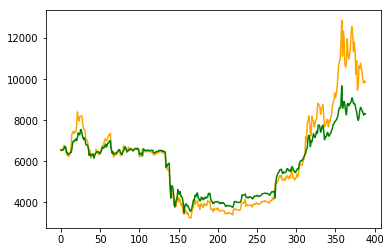

In [117]:
def main():    
    # ------------------------------------------ PREPROCESSING ----------------------------------------------
    raw_price_data = fetch_latest_BTC_JSON()
#     raw_price_data = fetch_btc_prices()
    data_df = parse_alphaV_JSON(raw_data=raw_price_data)
    data_df = data_df.iloc[::-1]
    
    print(data_df)
    
    prices = np.array(data_df['4a. close (USD)'].tolist())
    print(prices)
    
    original_volume = data_df['5. volume'].values
    min_volume = np.min(data_df['5. volume'].values)
    max_volume = np.max(data_df['5. volume'].values)
    
    print('---------------- original volume -----------------------')
    print(original_volume)
    print('---------------- original volume -----------------------')
    
    print(min_volume)
    print(max_volume)
    
    data_df_temp = data_df.drop(labels=['1a. open (USD)','1b. open (USD)','2b. high (USD)','3b. low (USD)','4a. close (USD)','4b. close (USD)','6. market cap (USD)'],axis=1) # ,'2a. high (USD)','3a. low (USD)'
    minmax_2 = preprocessing.MinMaxScaler()
    print('------slattt-----')
    print(data_df_temp)
    data_df_temp = pd.DataFrame(minmax_2.fit_transform(data_df_temp), columns=data_df_temp.columns)
    
    # -- Normalize the Data --
    min_max_scaler = preprocessing.MinMaxScaler()
    data_df = pd.DataFrame(min_max_scaler.fit_transform(data_df), columns=data_df.columns)
    # print(data_df)
    data_df = table_edit(data_df)
    y_train = np.array(data_df['4a. close (USD)'].tolist())
    data_df = data_df.drop(labels=['4a. close (USD)'],axis=1)
    
    data_df = data_df.drop(labels=['1a. open (USD)','6. market cap (USD)'],axis=1) # ,'2a. high (USD)','3a. low (USD)'
    print('---new---')
    print(data_df)

#     vmas = VMA_calculation(prices=data_df['5. volume'].values)
    
#     #print(vmas)
#     #print(un_normalize(norm_val=vmas,min_val=min_volume,max_val=max_volume,typelist=True))
    
#     x_train,y_train,x_test,y_test,train_dataloader,test_dataloader = vol_dataset_prep(vmas,data_df['5. volume'].values,original_volume)
#     vol_predictor = NumberRegression_MLP()
#     model,loss_func,_,_ = vol_train(vol_predictor, train_dataloader)
#     test_loss,accuracy,predictions = vol_test(vol_predictor,loss_func,test_dataloader,min_volume,max_volume)
#     vol_prediction_visualization(predictions,y_test,min_volume,max_volume)
#     #print(data_df)
#     test = data_df['5. volume'].values
#     print(test)
#     volume_visualization(test)

    model = TimeCNN()#MLP(3)
    losses, test_data_loader, loss_func, model, min_price, max_price, test_prices = train(model, data_df.values,y_train,prices)
    loss_visualize(losses)
    _, _, all_unnormed_outputs = validation_test(test_dataloader=test_data_loader,criterion=loss_func, model=model, norm_min=min_price, norm_max=max_price)
    
    prediction_visualization(minimum_price=min_price,maximum_price=max_price,close_prices=test_prices,model_predictions=all_unnormed_outputs)
    return minmax_2,model,min_price,max_price

min_max_scaler,price_model,min_price,max_price = main()

In [119]:
def inference(value, normalize_method, model,minimum_price,maximum_price):
    value = np.array(value).reshape(1,-1)
    # -- Normalize the value --
    value = torch.tensor(normalize_method.transform(value)).float()
    
    if(str(device) == 'cuda'):
        value = value.to(device)
    
    output = model(value)
    output_unnorm = un_normalize(norm_val=output.detach(),min_val=minimum_price,max_val=maximum_price)
    return output_unnorm

def main(normalizer,model,minimum_price,maximum_price):
    output = inference(value=[ 9600,10000,vol[-1]],
                       normalize_method=normalizer,
                       model=model,
                       minimum_price=minimum_price,
                       maximum_price=maximum_price
                      )
    print('BTC prediction: ', output)
    
    
main(normalizer=min_max_scaler,model=price_model,minimum_price=min_price,maximum_price=max_price)



BTC prediction:  tensor([8403.4746], device='cuda:0')
